<a href="https://colab.research.google.com/github/1aidea/cs480student/blob/main/01/Copy_of_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

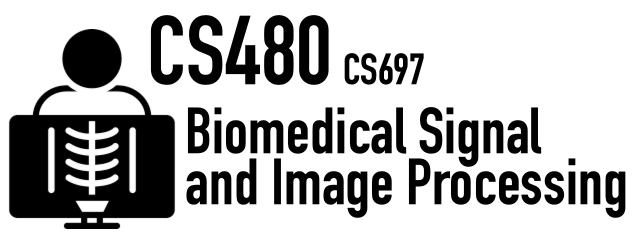
# Assignment 1


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [4]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

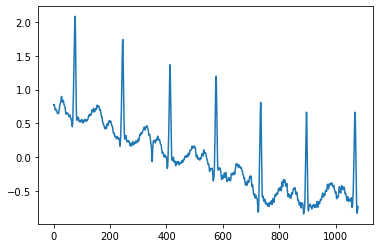

In [5]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds

task1 = ecg[8*SAMPLING_RATE: 11*SAMPLING_RATE]
plt.plot(task1)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [6]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [7]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 1.1 MB 4.5 MB/s 


In [8]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [9]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


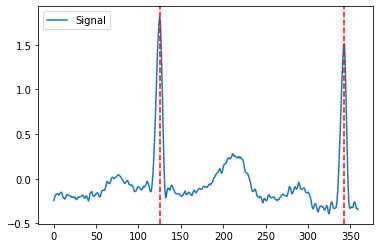

In [10]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

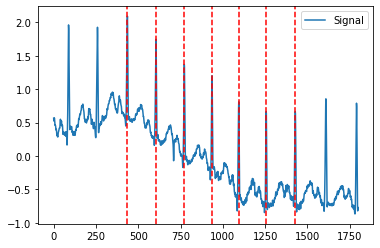

In [23]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1





# This is the original range for task 1
# task1 = ecg[8*SAMPLING_RATE: 11*SAMPLING_RATE]

# this is the range for task1 +- 1 second to see five peaks. 
task2 = ecg[7*SAMPLING_RATE: 12*SAMPLING_RATE]

_, rpeaks2 = nk.ecg_peaks(task2, sampling_rate=SAMPLING_RATE)

plot = nk.events_plot(rpeaks2['ECG_R_Peaks'][1:8], task2)



**Task 3:** Detect Heartrate. [15 Points]

In [12]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [47]:
# get the ECG readings for the first 15 seconds.
task3 = ecg[0: 15*SAMPLING_RATE]

_, rpeaks = nk.ecg_peaks(task3, sampling_rate=SAMPLING_RATE)

# total number of Rpeaks for a 15 second interval
interval15 = size(rpeaks['ECG_R_Peaks'])

# to get beats per minute, multiply the result from the 15 second interval by 4. 

heartRate = interval15 * 4
print("Heart Rate of: " + str(heartRate) + " BPM")

# This is an elevated heart rate which is not normal.




Heart Rate of: 120 BPM


**Task 4:** Detect P Q S T Peaks. [25 Points]

In [14]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

_, waves_peak = nk.ecg_delineate(task2, rpeaks2, sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')

#_, waves_peak = nk.ecg_delineate(task2, rpeaks2, sampling_rate=SAMPLING_RATE, show=True)

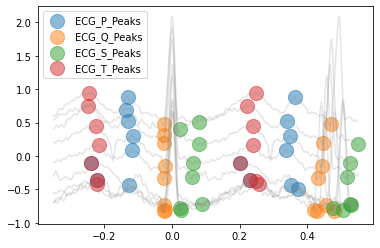

In [36]:
# TODO Does the detection work well?

"""
This detection works well by looking at the similarities between the points in 
the plotted graph, however, by looking at the second heart beat on the overlapped
graph we can see that the accuracy stops slightly. indicated by te grouped up
orange and green dots. But overall it does have good detection for the [9 - 11]
range.
"""


**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

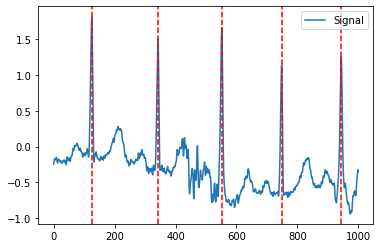

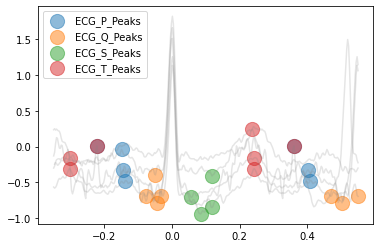

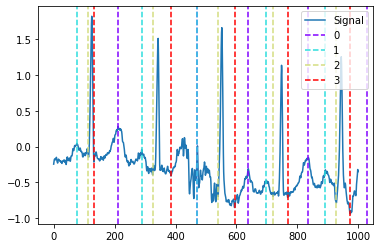

In [52]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.
bonus1 = ecg
_, rpeaks = nk.ecg_peaks(bonus1, sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:5], bonus1[0:1000])

# use only first 5 rpeaks
_, waves_peak = nk.ecg_delineate(bonus1, rpeaks['ECG_R_Peaks'][0:5], sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], bonus1[:1000])




"""
The plotting for the bonus task does not look good compared to the plot
from task4 as all the PQST points are all over the place. 
"""


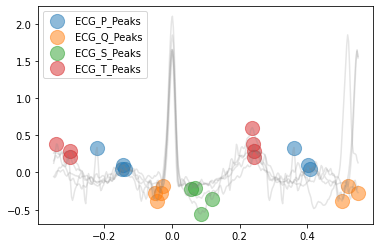

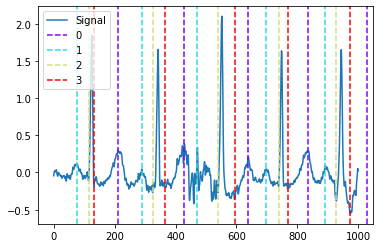

In [63]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.




filtered_ECG = nk.signal_filter(bonus1, sampling_rate=SAMPLING_RATE, lowcut=0.75, highcut=None)
_, waves_peak = nk.ecg_delineate(filtered_ECG, rpeaks['ECG_R_Peaks'][0:5], sampling_rate=SAMPLING_RATE, method="peak", show=True, show_type='peaks')
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], filtered_ECG[:1000])

In [66]:
# TODO Does the filtering improve the result?

"""
The filtered signal does improve the accuracy of the PQST points
significantly. You can see this with the T, Q, S points as they 
are now correctly classified. There are some P points that are a bit off but 
overall the accuracy is good overall. I tried modifying the highcut values but
I kept on getting strange results with my plots so I only modified the lowcut
values and it worked for me. 
"""

'\nThe filtered signal does improve the accuracy of the PQST points\nsignificantly. You can see this with the T, Q, S points as they \nare now correctly classified. There are some P points that are a bit off but \noverall the accuracy is good overall. I tried modifying the highcut values but\nI kept on getting strange results with my plots so I only modified the lowcut\nvalues and it worked for me. \n'

In [65]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#